In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Load the Dataset

In [120]:
car_data = pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis (EDA)

In [121]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [122]:
car_data.isna().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [123]:
car_data.drop_duplicates(inplace=True)
car_data.drop(columns=['Car_Name'], inplace=True)


## Plot Numerical Column Distributions

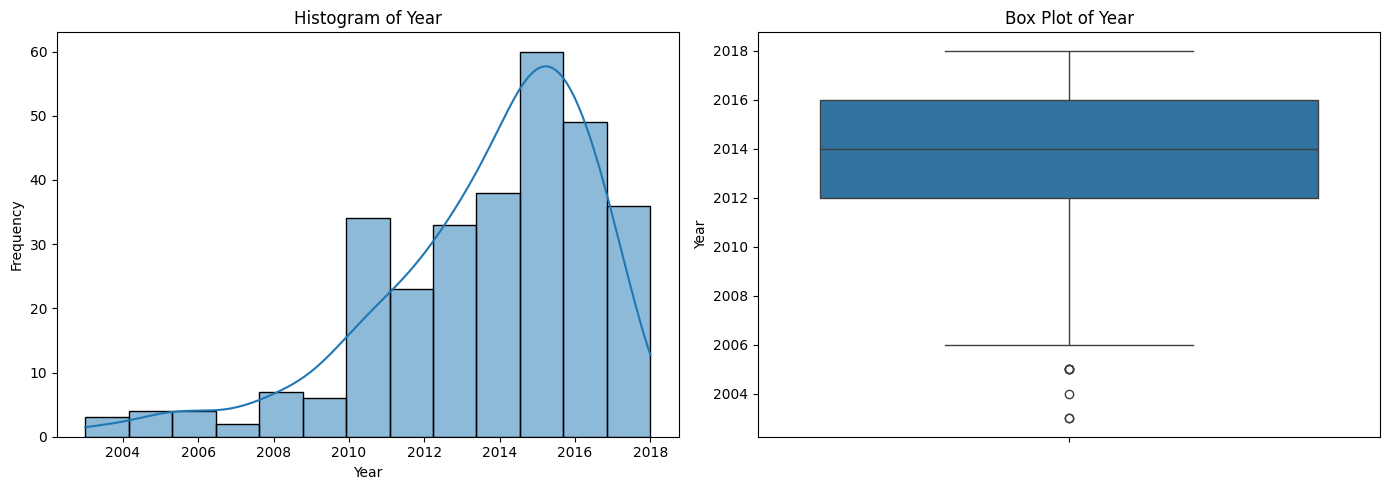

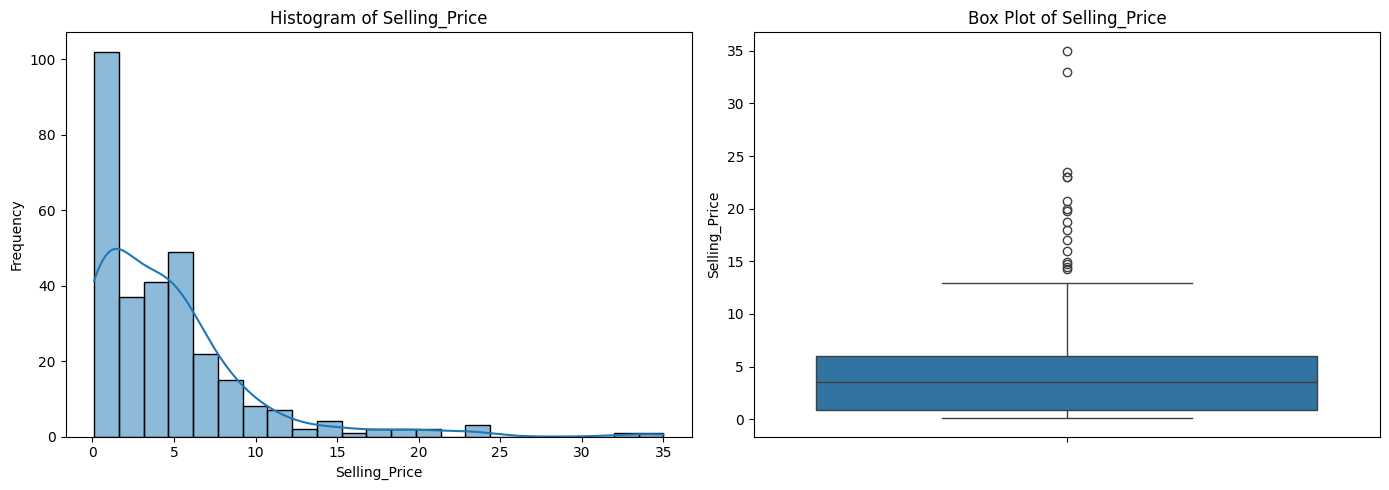

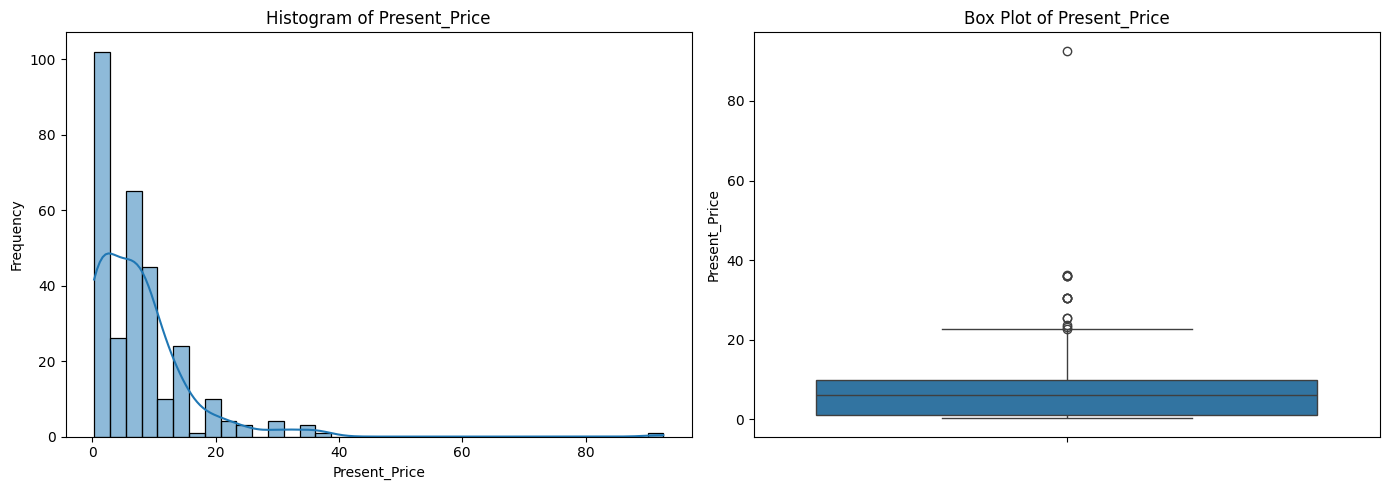

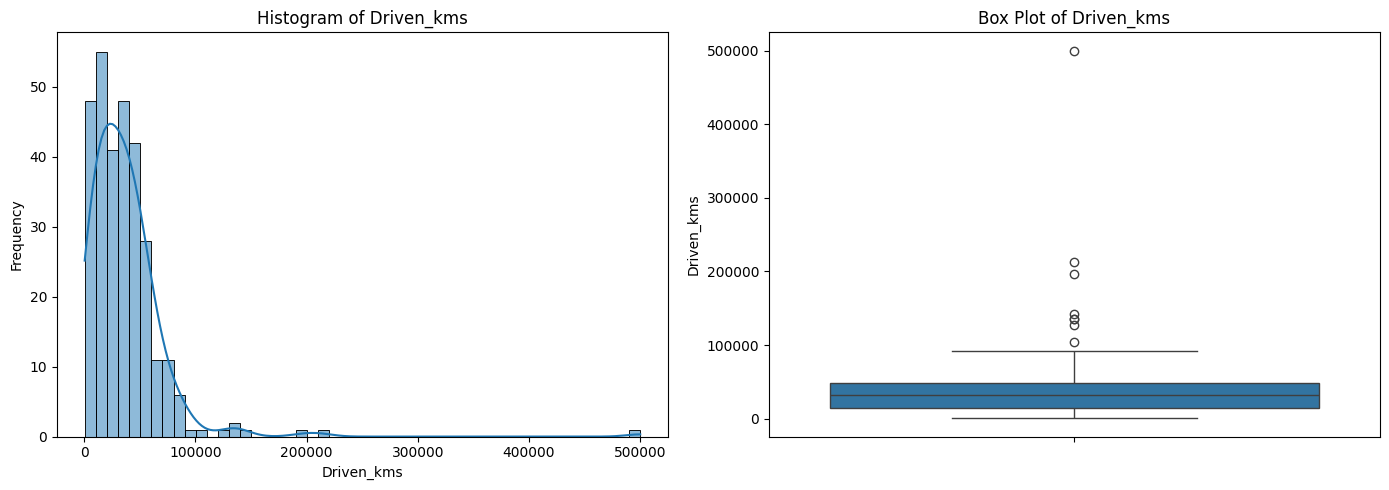

In [124]:
numerical_cols = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(car_data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    sns.boxplot(y=car_data[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

## Plot Categorical Column Frequencies

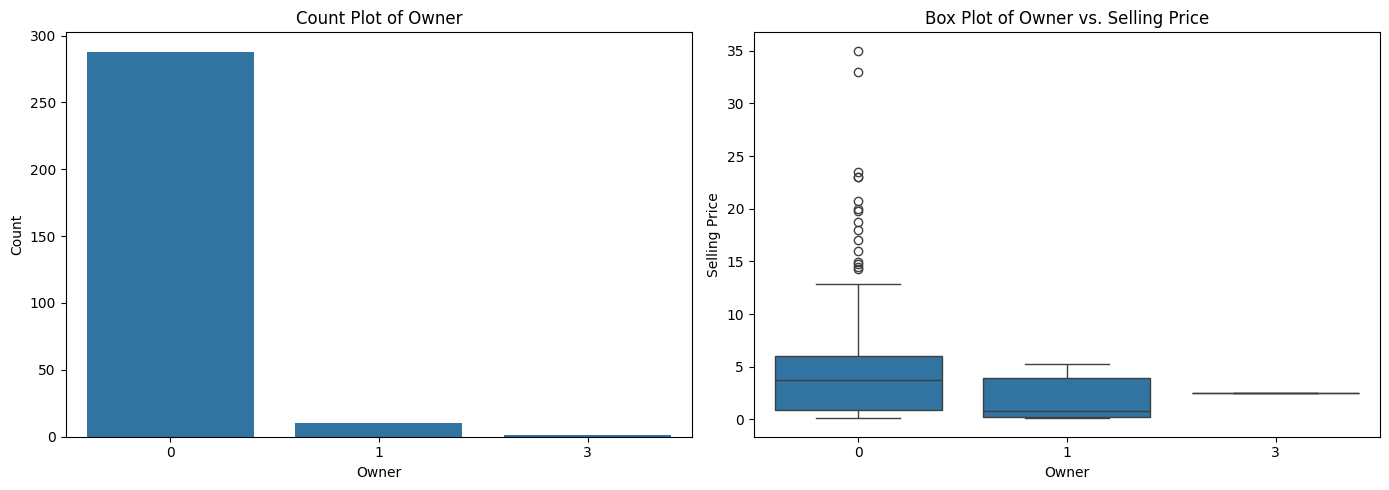

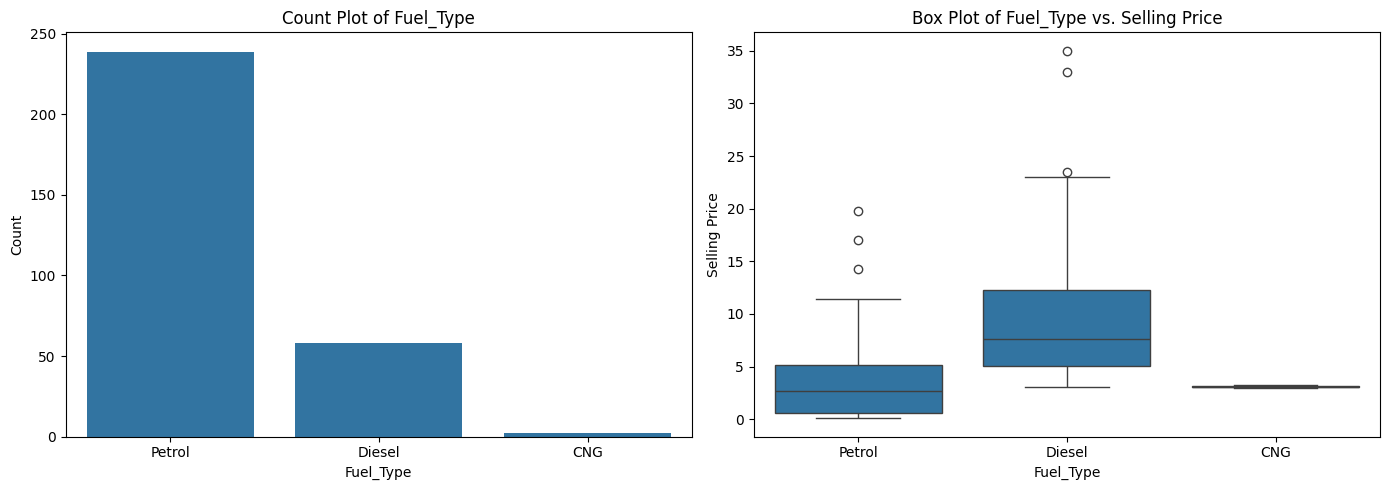

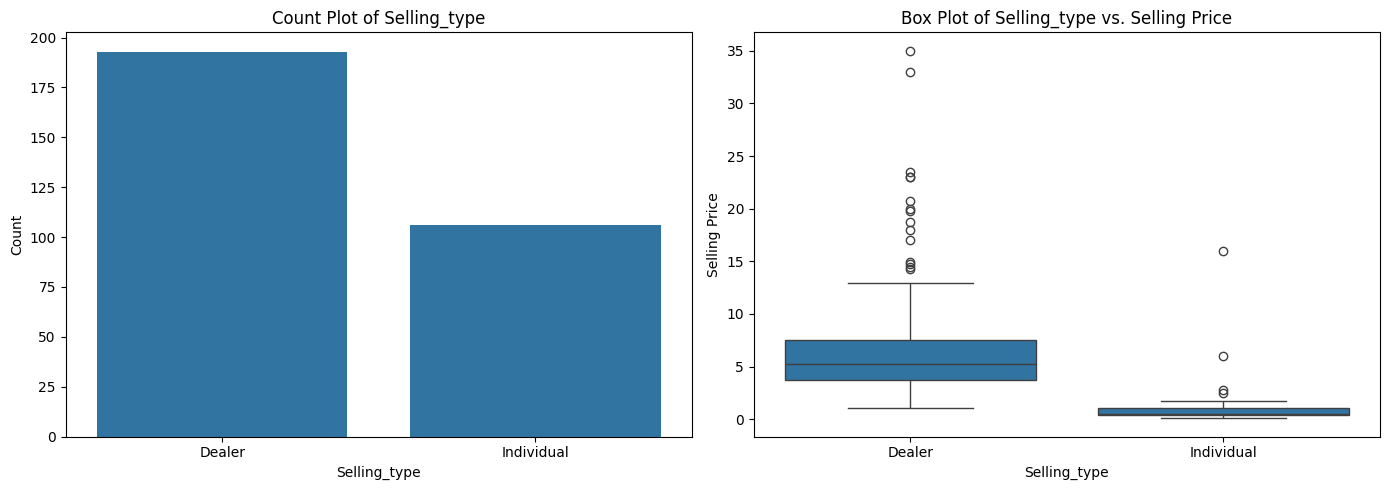

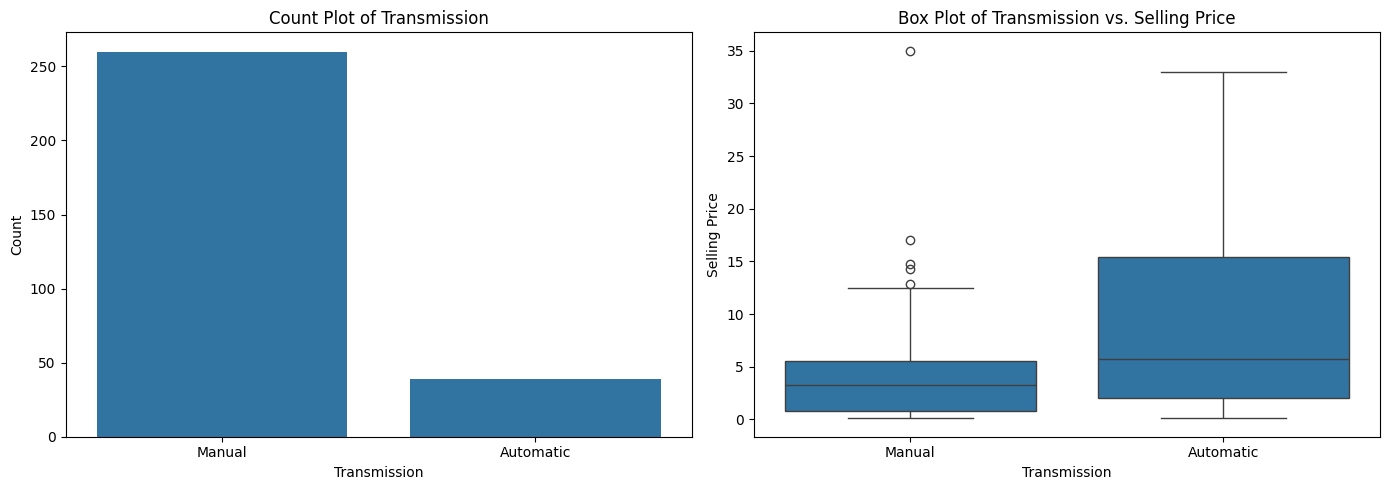

In [125]:
category_columns = ['Owner', 'Fuel_Type', 'Selling_type', 'Transmission']

for col in category_columns:
  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  sns.countplot(x=car_data[col], ax=axes[0])
  axes[0].set_title(f'Count Plot of {col}')
  axes[0].set_xlabel(col)
  axes[0].set_ylabel('Count')

  sns.boxplot(x=car_data[col], y=car_data['Selling_Price'], ax=axes[1])
  axes[1].set_title(f'Box Plot of {col} vs. Selling Price')
  axes[1].set_xlabel(col)
  axes[1].set_ylabel('Selling Price')


  plt.tight_layout()
  plt.show()

# Preprocessing

In [126]:
# Handle Categorical data
car_data = pd.get_dummies(car_data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

car_data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [127]:
# Feature Engineering
car_data['Age'] = 2023 - car_data['Year']
car_data.drop(columns=['Year'], inplace=True)

car_data_LRS = car_data.copy()
car_data_RF = car_data.copy()
car_data.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Age
0,3.35,5.59,27000,0,False,True,False,True,9
1,4.75,9.54,43000,0,True,False,False,True,10
2,7.25,9.85,6900,0,False,True,False,True,6
3,2.85,4.15,5200,0,False,True,False,True,12
4,4.60,6.87,42450,0,True,False,False,True,9


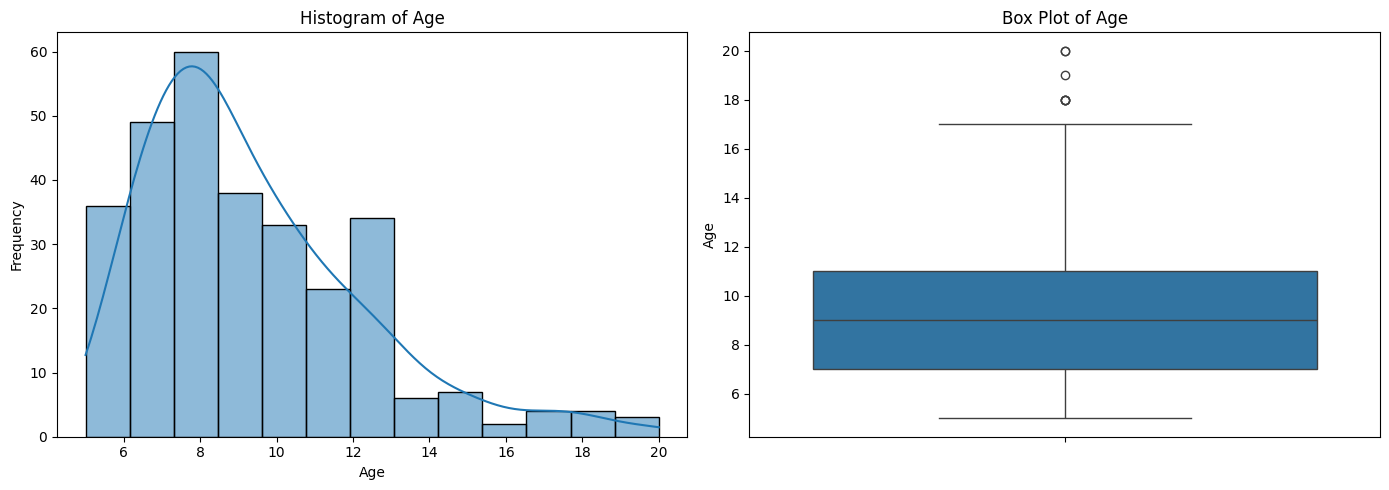

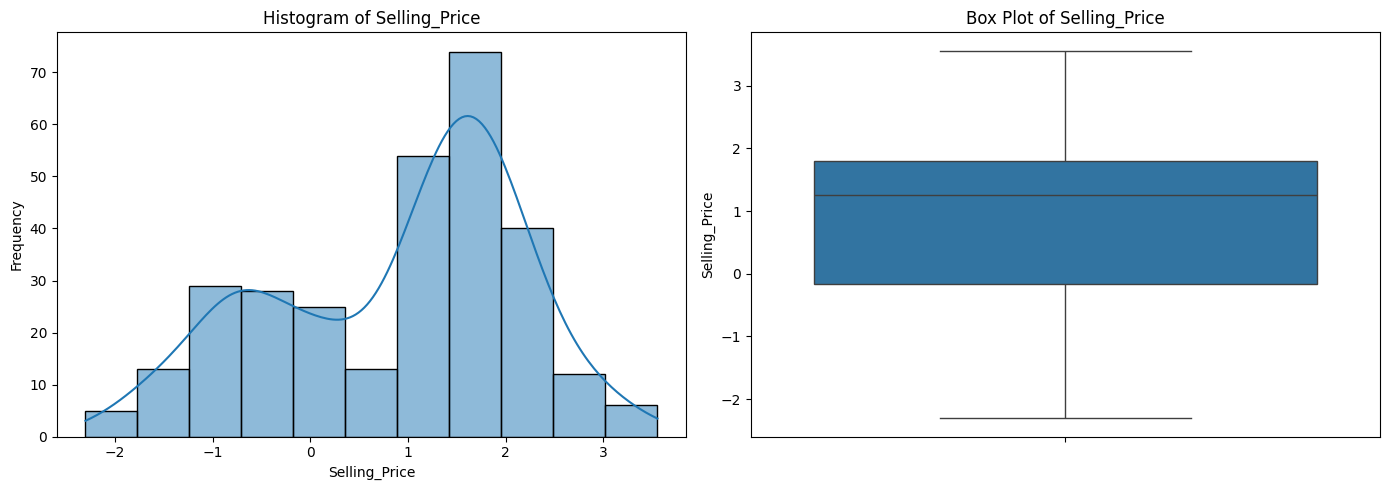

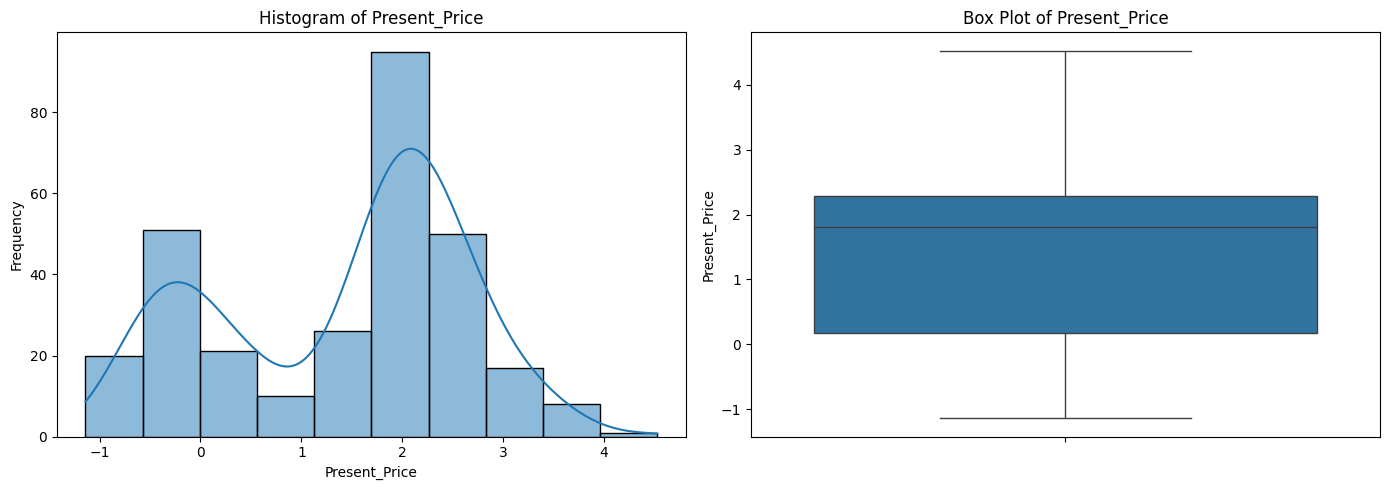

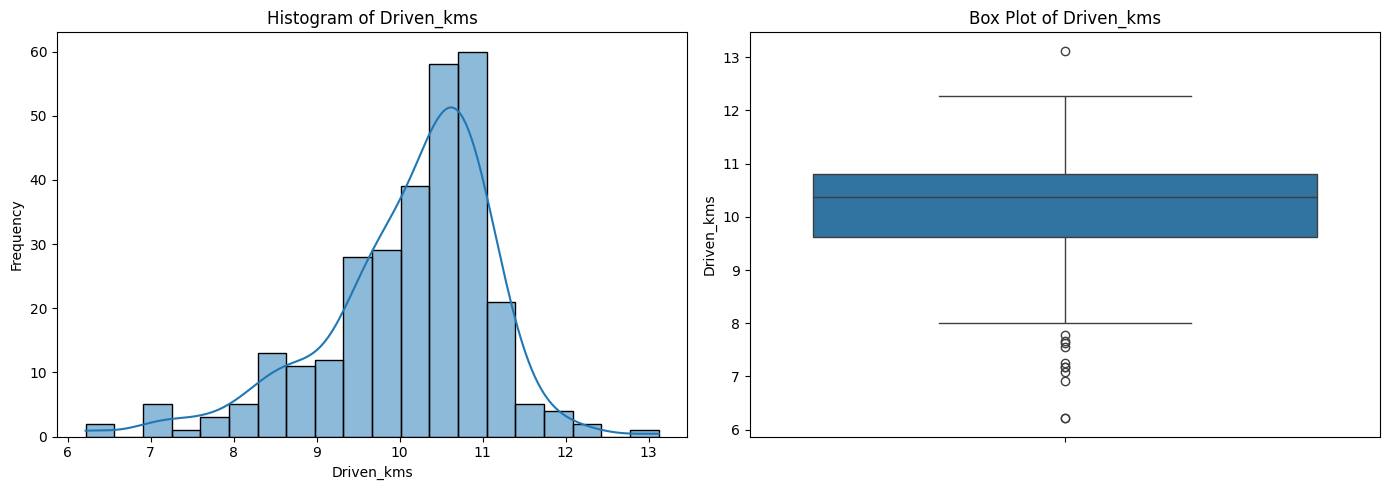

In [128]:
# Log transform to handle Skewness
car_data_LRS['Selling_Price'] = np.log(car_data_LRS['Selling_Price'])
car_data_LRS['Present_Price'] = np.log(car_data_LRS['Present_Price'])
car_data_LRS['Driven_kms'] = np.log(car_data_LRS['Driven_kms'])

numerical_cols = ['Age', 'Selling_Price', 'Present_Price', 'Driven_kms']

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(car_data_LRS[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    sns.boxplot(y=car_data_LRS[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# Correlation Plots

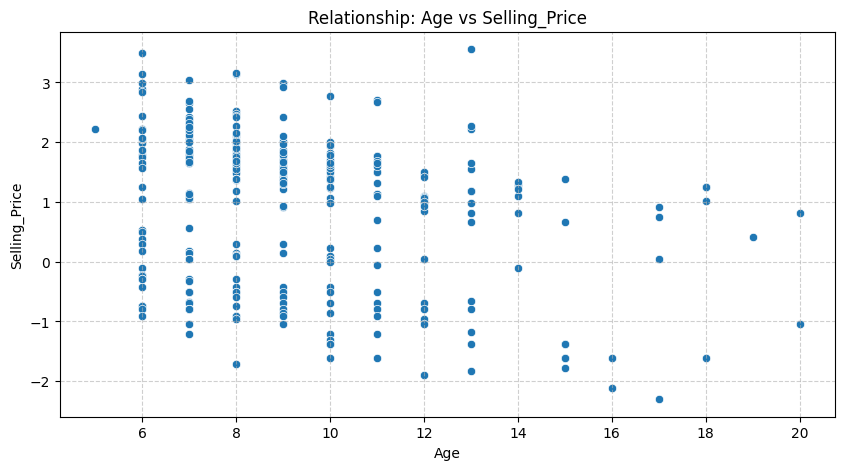

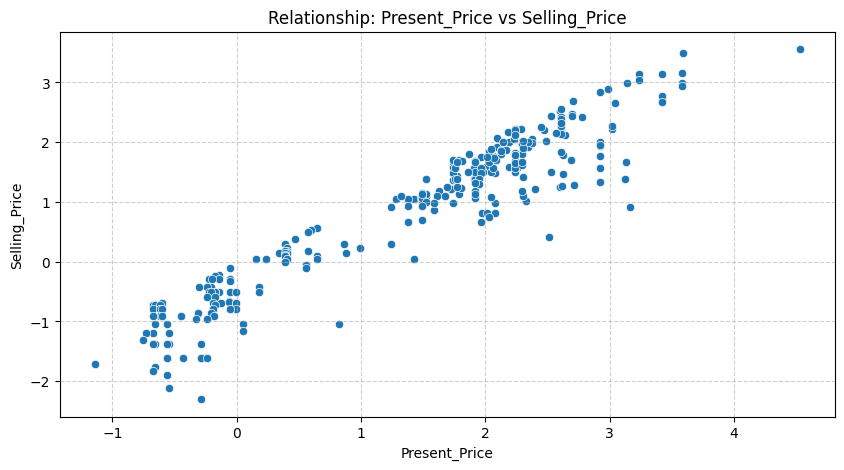

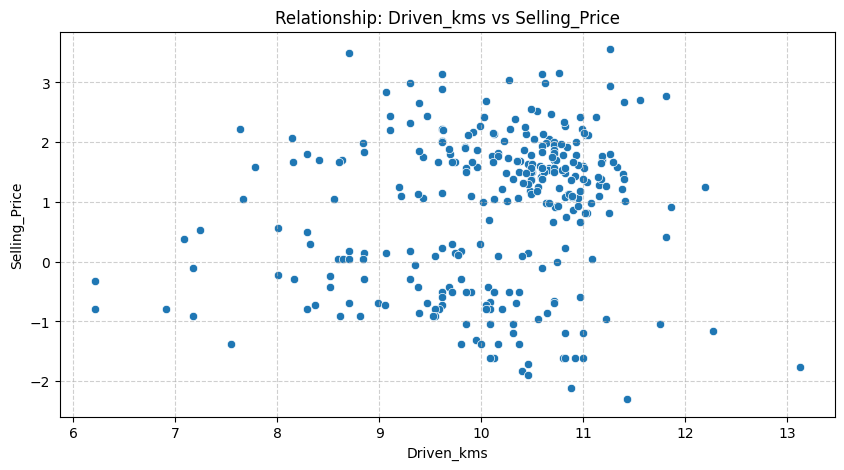

In [129]:
# Scatter plots
independent_cols = ['Age', 'Present_Price', 'Driven_kms']
dependent_col = 'Selling_Price'

for col in independent_cols:
    plt.figure(figsize=(10, 5))
    # Using seaborn to handle the 'hue' (color-coding)
    sns.scatterplot(data=car_data_LRS, x=col, y=dependent_col)

    plt.title(f'Relationship: {col} vs {dependent_col}')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

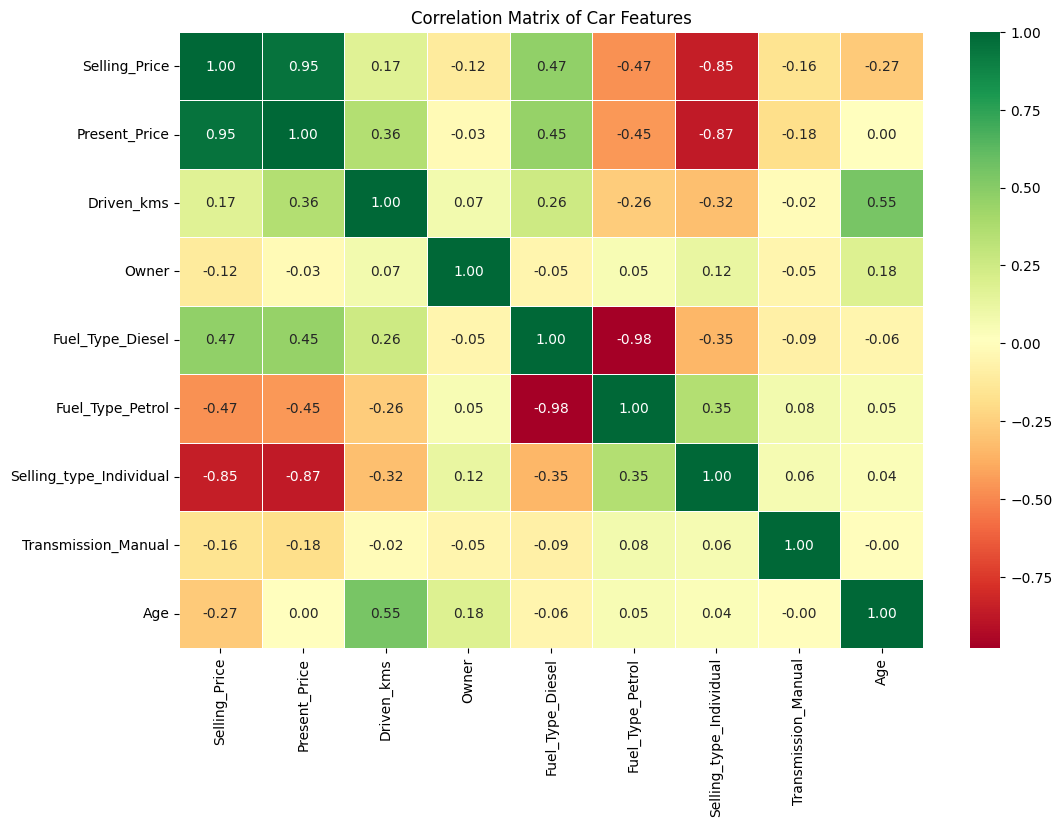

In [130]:
# Calculate the correlation matrix
# Since we have dummy variables and numerical features, this will show
# how everything relates to the Selling_Price and each other.
correlation_matrix = car_data_LRS.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
# annot=True shows the numbers, cmap='RdYlGn' gives a nice Red-Yellow-Green scale
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix of Car Features')
plt.show()

In [131]:
# Split and Normalize the data

# 1. Define Features (X) and Target (y)
X = car_data_LRS.drop(columns=['Selling_Price'])
y = car_data_LRS['Selling_Price']

# 2. Split the data
# Using 20% for testing to see how well our -0.85 and 0.47 correlations hold up
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardization (Scaling)
# We scale the numerical columns so they have Mean=0 and Std=1
# Linear Regression needs this to treat 'Driven_kms' and 'Age' fairly
scaler = StandardScaler()

# Numerical columns to scale (we exclude the 0/1 dummies)
num_cols = ['Present_Price', 'Driven_kms', 'Age', 'Owner']

# Fit and transform the training set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform the test set using the SAME scaler
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Linear Regression

In [132]:
# Initialize the model
lr_model = LinearRegression()

# Fit the model on the scaled training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

In [133]:
# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R-squared Score: 0.9753
Mean Squared Error: 0.0423


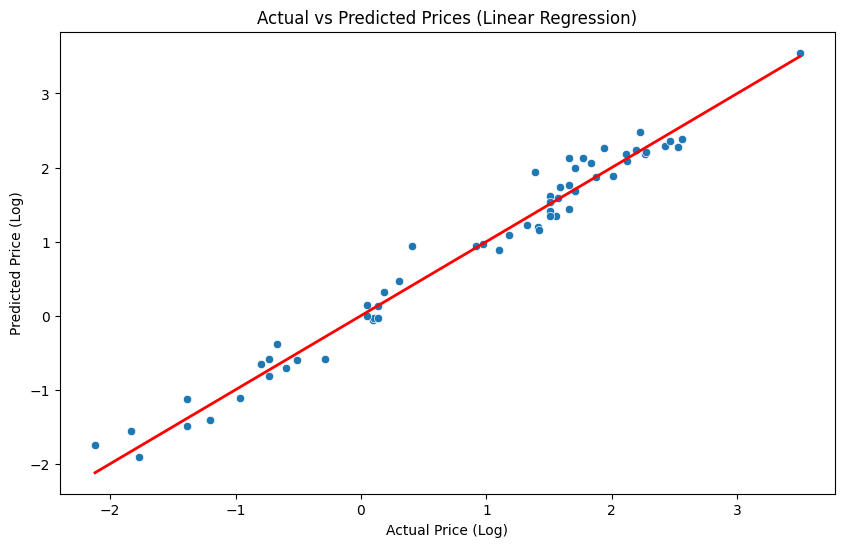

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Price (Log)')
plt.ylabel('Predicted Price (Log)')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

In [135]:
# Create a dataframe to see the impact of each feature
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print(coefficients)

                         Coefficient
Present_Price               1.134538
Fuel_Type_Diesel            0.274800
Fuel_Type_Petrol            0.150162
Transmission_Manual        -0.010588
Owner                      -0.037029
Driven_kms                 -0.074494
Selling_type_Individual    -0.152095
Age                        -0.272731


In [136]:
# We use the full X_scaled and y (log-transformed)
# scoring='r2' tells the function to return the R-squared for each fold
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='r2')

print(f"All 10 Scores: {cv_scores}")
print(f"\nMean R2 Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

All 10 Scores: [ 0.84982294  0.96443763  0.92766358  0.94657001 -0.04683584 -0.21709898
  0.97087722  0.86873847  0.8921925   0.91477018]

Mean R2 Score: 0.7071
Standard Deviation: 0.4229


In [137]:
# 1. Use shuffled KFold for a fair validation
kf_shuffled = KFold(n_splits=10, shuffle=True, random_state=42)

# 2. Re-initialize the Linear Model
lr_model_stable = LinearRegression()

# 3. Run the 10-Fold CV
lr_shuffled_scores = cross_val_score(lr_model_stable, X, y, cv=kf_shuffled, scoring='r2')

print(f"Shuffled Linear Regression 10-Fold Scores:\n{lr_shuffled_scores}")
print(f"\nMean R2 Score: {lr_shuffled_scores.mean():.4f}")
print(f"Standard Deviation: {lr_shuffled_scores.std():.4f}")

Shuffled Linear Regression 10-Fold Scores:
[0.98396456 0.96784434 0.98711156 0.96214249 0.97940609 0.97984711
 0.98524408 0.96397226 0.97119534 0.98385219]

Mean R2 Score: 0.9765
Standard Deviation: 0.0089


# Random Forest Regressor

In [138]:
car_data_RF.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Age
0,3.35,5.59,27000,0,False,True,False,True,9
1,4.75,9.54,43000,0,True,False,False,True,10
2,7.25,9.85,6900,0,False,True,False,True,6
3,2.85,4.15,5200,0,False,True,False,True,12
4,4.60,6.87,42450,0,True,False,False,True,9


In [139]:
car_data_RF['Selling_Price'] = np.log1p(car_data_RF['Selling_Price'])
car_data_RF['Present_Price'] = np.log1p(car_data_RF['Present_Price'])

# 4. Define X and y
X = car_data_RF.drop(columns=['Selling_Price'])
y = car_data_RF['Selling_Price']

# 5. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Age
6,2.210470,18796,0,False,True,False,True,8
185,0.457425,1900,0,False,True,True,False,15
187,0.412110,32000,0,False,True,True,True,10
148,0.662688,45000,0,False,True,True,True,13
31,1.773256,54200,0,False,True,False,True,12


In [140]:
# Initialize the model
# We'll use 100 trees and set a max_depth to prevent overfitting on this small dataset
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf):.4f}")

Random Forest R2 Score: 0.8399


In [141]:
# Run 10-fold CV on the new setup
rf_cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='r2')

print(f"Random Forest 10-Fold Scores:\n{rf_cv_scores}")
print(f"\nMean R2 Score: {rf_cv_scores.mean():.4f}")
print(f"Standard Deviation: {rf_cv_scores.std():.4f}")

Random Forest 10-Fold Scores:
[ 0.87457056  0.94826029  0.80177744  0.93551482 -1.58346082 -2.45769039
  0.96837728  0.90665618  0.8663586   0.8867375 ]

Mean R2 Score: 0.3147
Standard Deviation: 1.1847


In [142]:
# 1. Initialize KFold with Shuffling
# This is the most important change!
kf_shuffled = KFold(n_splits=10, shuffle=True, random_state=42)

# 2. Re-initialize the Random Forest
rf_model_stable = RandomForestRegressor(n_estimators=100, random_state=42)

# 3. Re-run Cross-Validation with the Shuffled Folds
rf_shuffled_scores = cross_val_score(rf_model_stable, X, y, cv=kf_shuffled, scoring='r2')

print(f"Shuffled RF 10-Fold Scores:\n{rf_shuffled_scores}")
print(f"\nMean R2 Score: {rf_shuffled_scores.mean():.4f}")
print(f"Standard Deviation: {rf_shuffled_scores.std():.4f}")

Shuffled RF 10-Fold Scores:
[0.96118829 0.85209835 0.97048406 0.98053149 0.98043386 0.95593143
 0.97696434 0.97850853 0.97890099 0.98691721]

Mean R2 Score: 0.9622
Standard Deviation: 0.0378


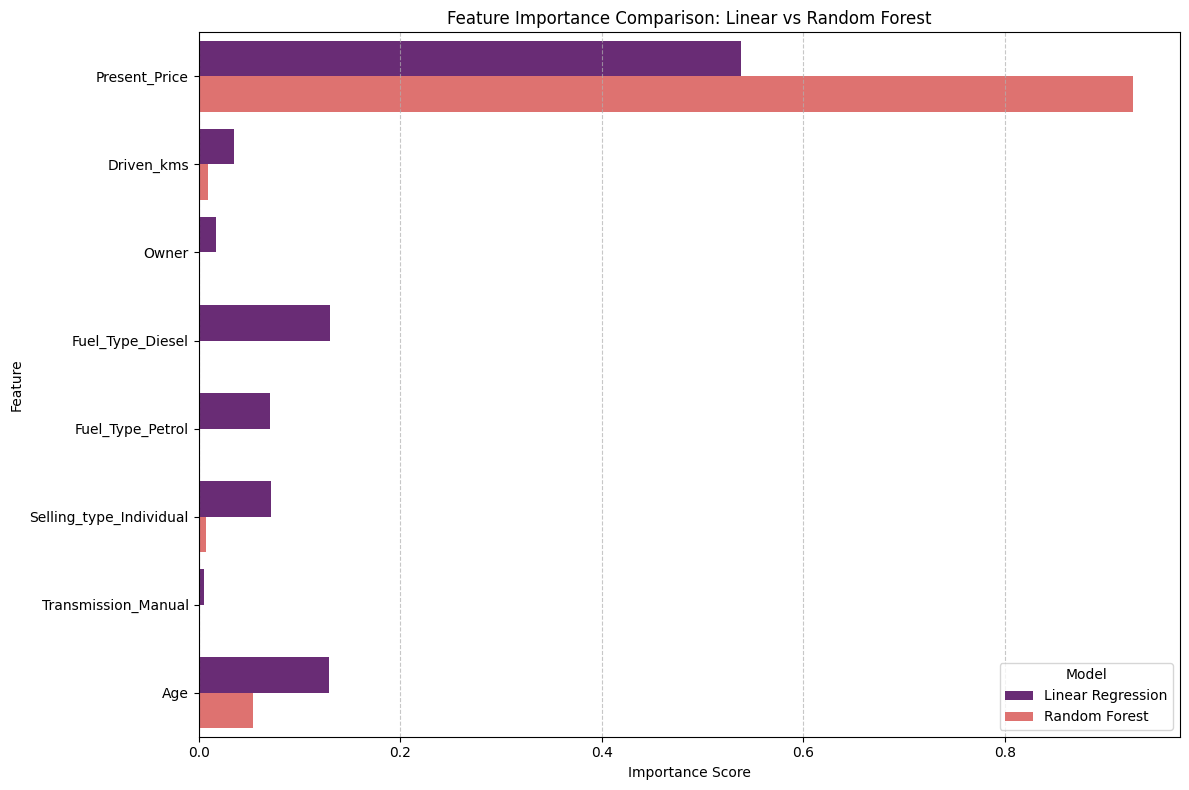

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get Linear Regression "Importance" (Absolute value of coefficients)
lr_importance = np.abs(lr_model.coef_)
lr_importance = lr_importance / np.sum(lr_importance) # Normalize to 1.0

# 2. Get Random Forest Importance
rf_importance = rf_model.feature_importances_

# 3. Create a combined DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': lr_importance,
    'Random Forest': rf_importance
}).melt(id_vars='Feature', var_name='Model', value_name='Importance Score')

# 4. Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance Score', y='Feature', hue='Model', palette='magma')

plt.title('Feature Importance Comparison: Linear vs Random Forest')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()